# 뉴럴네트워크 다중분류(mnist - 흑백이미지)

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

## 1.데이터 준비

In [47]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 2.데이터 정보

In [49]:
samples = np.random.randint(60000, size=25)
samples

array([32304,  9664, 42597, 55461, 42961, 11439, 18739, 45301, 10443, 24332, 31168, 48310, 23996, 13169,  9959,  8367, 17247, 38736, 38495, 47242, 57165, 57625, 57486, 14291, 55883])

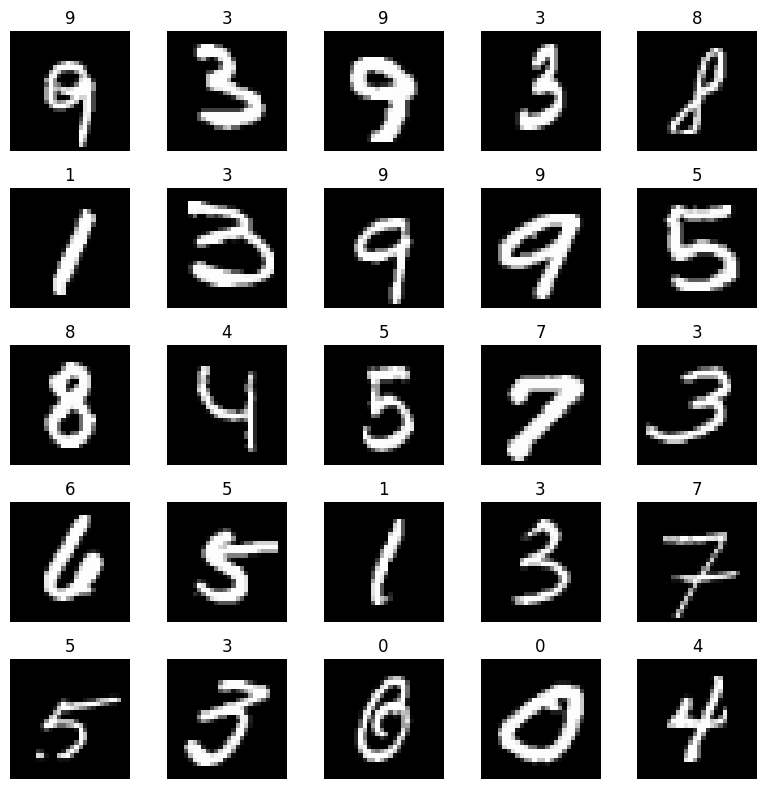

In [50]:
fig = plt.figure(figsize=(8, 8))

for i, idx in enumerate(samples):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(y_train[idx])
plt.tight_layout()
plt.show()

In [51]:
np.set_printoptions(linewidth=np.inf)
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221, 253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253, 253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253, 195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [52]:
pd.Series(y_train).value_counts()

,count
1,6742
7,6265
3,6131
2,5958
9,5949
0,5923
6,5918
8,5851
4,5842
5,5421


## 3.데이터 분리

- 검증용 데이터 분리

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [55]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

### 스케일
- Min-Max Scailing

In [56]:
X_train_s = X_train.astype('float32')/255.
X_val_s = X_val.astype('float32')/255.

### 원핫인코딩

In [57]:
from keras.utils import to_categorical

In [58]:
y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

In [59]:
y_train_o[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

## 4.모델 만들기

In [60]:
from keras import layers

In [61]:
X_train_s.shape

(48000, 28, 28)

In [62]:
X_train_s = X_train_s.reshape(-1, 28 * 28)
X_train_s.shape

In [63]:
X_val_s = X_val_s.reshape(-1, 28 * 28)
X_val_s.shape

(12000, 784)

In [64]:
model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    # 출력 레이어
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,818 (100.85 KB)

 Trainable params: 25,818 (100.85 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
adam = keras.optimizers.Adam(learning_rate=0.003)

In [66]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

In [67]:
EPOCHS = 30
BATCHSIZE = 32

In [68]:
history = model.fit(
    X_train_s,
    y_train_o,
    epochs=EPOCHS,
    batch_size=BATCHSIZE,
    validation_data=(X_val_s, y_val_o)
)

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.7865 - loss: 0.7421 - val_acc: 0.9333 - val_loss: 0.2412
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9388 - loss: 0.2108 - val_acc: 0.9436 - val_loss: 0.1967
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9530 - loss: 0.1616 - val_acc: 0.9542 - val_loss: 0.1565
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9600 - loss: 0.1366 - val_acc: 0.9526 - val_loss: 0.1628
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9643 - loss: 0.1167 - val_acc: 0.9596 - val_loss: 0.1388
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9671 - loss: 0.1085 - val_acc: 0.9614 - val_loss: 0.1309
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.9725 - loss: 0.0915 - val_acc: 0.9603 - val_loss: 0.1353
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.9729 - loss: 0.0896 - val_acc: 0.9635 - val_loss: 0.1339
Epoch 9/30
1500/1500 ━━━━━━━━━━━━━━━━━━━

In [69]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='train_acc')
    plt.plot(hist['epoch'], hist['val_acc'], label='val_acc')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

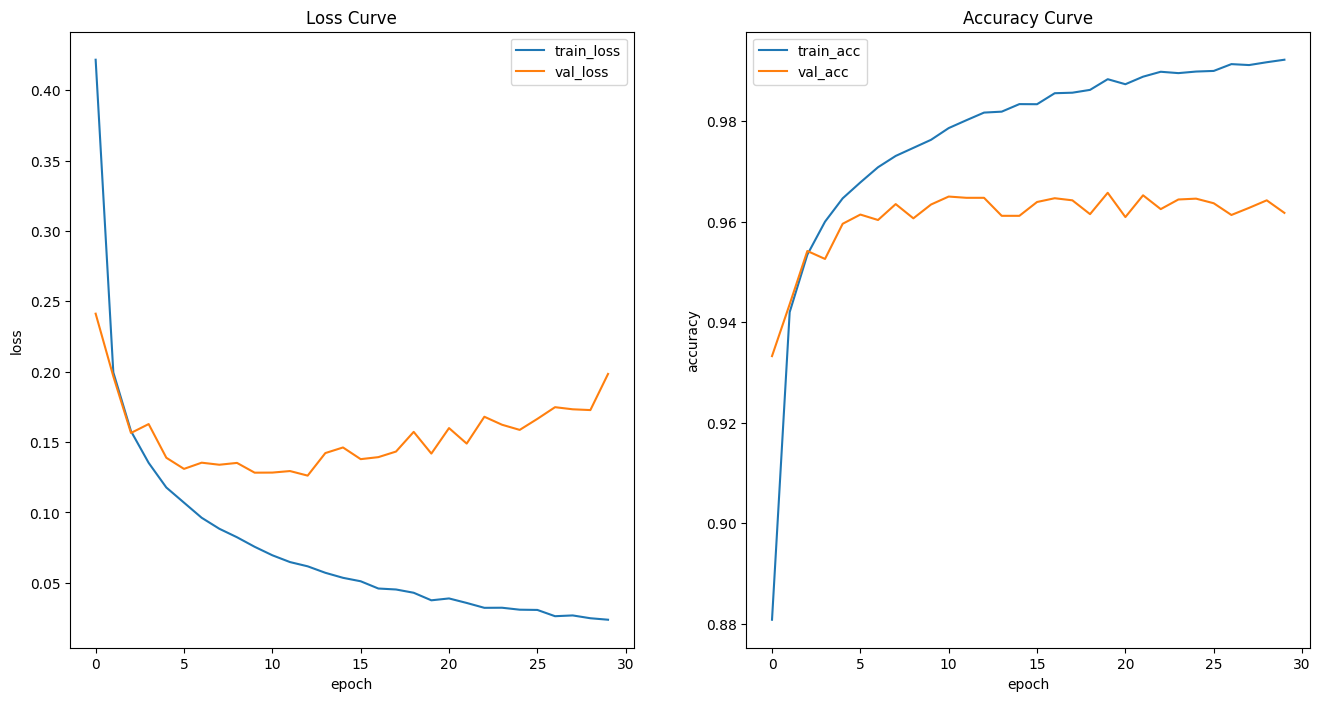

In [70]:
plot_history(history)

## 5.테스트

In [71]:
# 스케일링
X_test_s = X_test.astype('float')/255.

In [72]:
X_test_s = X_test_s.reshape(-1, 28 * 28)
X_test_s.shape

(10000, 784)

In [73]:
y_pred = model.predict(X_test_s)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[2.5558172e-08, 6.2312677e-10, 3.1621940e-07, ..., 9.9859977e-01, 4.6599703e-07, 1.7674634e-04],
       [7.8448347e-17, 3.0837341e-10, 9.9999994e-01, ..., 1.0610861e-20, 5.7620335e-09, 9.0303965e-14],
       [6.8196577e-08, 9.9947387e-01, 1.0334287e-09, ..., 2.6059022e-06, 3.6613642e-07, 3.9656475e-10],
       ...,
       [5.4909399e-20, 3.6214814e-17, 3.5586090e-25, ..., 3.1292375e-14, 1.6056096e-14, 1.5012751e-11],
       [7.3481081e-13, 6.4866545e-15, 1.3178381e-16, ..., 4.2235743e-14, 1.1159467e-07, 3.2431587e-15],
       [2.7300599e-12, 1.9234350e-17, 7.6989186e-16, ..., 2.6807840e-25, 4.9948618e-15, 5.0864011e-17]], dtype=float32)

In [74]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [75]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## 5.평가지표

In [76]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [77]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred,average='macro')
  pre = precision_score(y_true, y_pred,average='macro')
  f1 = f1_score(y_true, y_pred,average='macro')

  print('acc: ', acc)
  print('recall: ', np.around(re, 4))
  print('precision: ', np.around(pre, 4))
  print('f1: ', np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

acc:  0.9619
recall:  0.9615
precision:  0.9619
f1:  0.9615


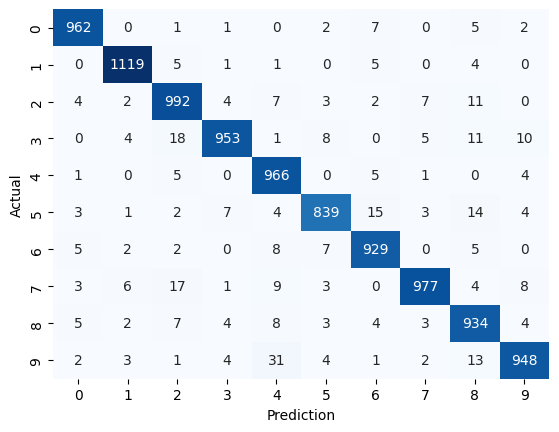

In [79]:
print_metrics(y_test, y_pred)